In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile as wave
from scipy.signal import argrelextrema as arg
from scipy.signal import find_peaks
import p398dlp_read_audio_function as RA

In [76]:
def find_1st_peak(audiofile):
    #reads in the sample rate and data from the wave file as a buffer array
    #sampleRate, audio = wave.read(audiofile)
    data = RA.read_audio(audiofile, 50000000)
    #data = np.frombuffer(data, dtype=np.int16)[100:-100]

    #filter the peaks along the audio signal
    peaks = find_peaks(data, height=np.mean(data)+6*np.std(data), distance=5000)[0]
    #print("the first peak is at", peaks[0]/32000, "seconds") # the first peak location

    #peaks_3 = find_peaks(data, height=np.mean(data)+40*np.std(data), distance=15000)[0]
    #print("the first peak_3 is at", peaks_3[0]/sampleRate, "seconds")

    #plots the audio signal
    plt.plot(data)
    #plots the peaks of signal_1
    y = [data[i] for i in peaks]
    plt.plot(peaks, y, 'ro',color='r')

    #plots the peaks of signal_3
    #y_3 = [data[i] for i in peaks_3] 
    #plt.plot(peaks_3,y_3,'ro',color='g')

    plt.ylabel("Amplitude")
    plt.xlabel("Samples")
    #plt.xlim([peaks[0]-10000, peaks[3]+10000])
    #plt.savefig('0.png')
    plt.show()
    return data

reading from file  sender_04.bin
ADC clock frequency (kHz)  1000.0
CPU clock frequency (kHz)  16000.0
ADC sample interval in CPU cycles  496
Arduino ADC analog pin recorded  7
Hit end of file, so exit the ADC data reading loop

All done. ADC data buffers read:  1240
ADC digitizations read:  314704
this corresponds to  0.16390833333333335  minutes of recording


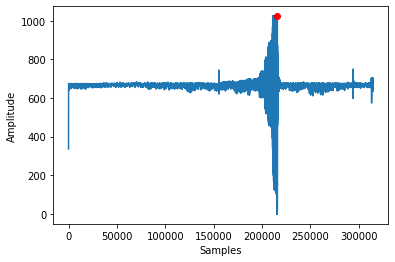

In [77]:
s04 = find_1st_peak('sender_04.bin')[170000:230000]

reading from file  receiver_04.bin
ADC clock frequency (kHz)  1000.0
CPU clock frequency (kHz)  16000.0
ADC sample interval in CPU cycles  496
Arduino ADC analog pin recorded  7
Hit end of file, so exit the ADC data reading loop

All done. ADC data buffers read:  847
ADC digitizations read:  214882
this corresponds to  0.11191770833333334  minutes of recording


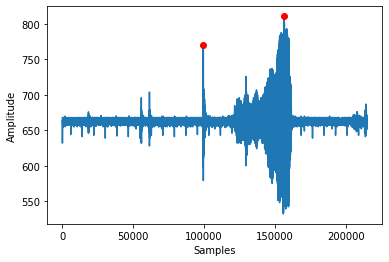

In [69]:
r04 = find_1st_peak('receiver_04.bin')[110000:170000]

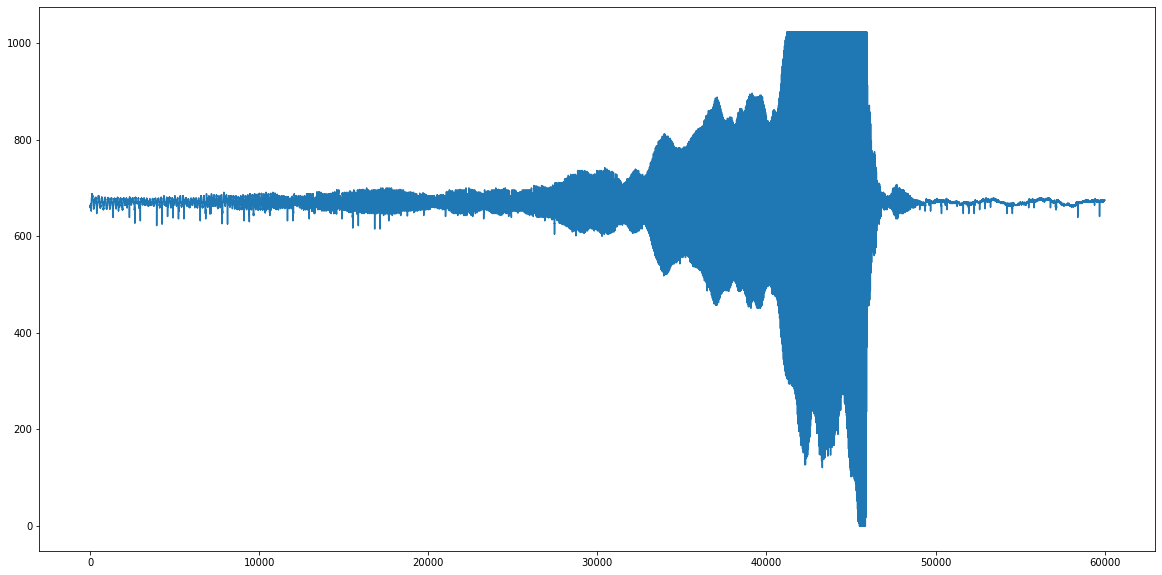

In [70]:
plt.figure(figsize=(20,10))
plt.plot(s04)

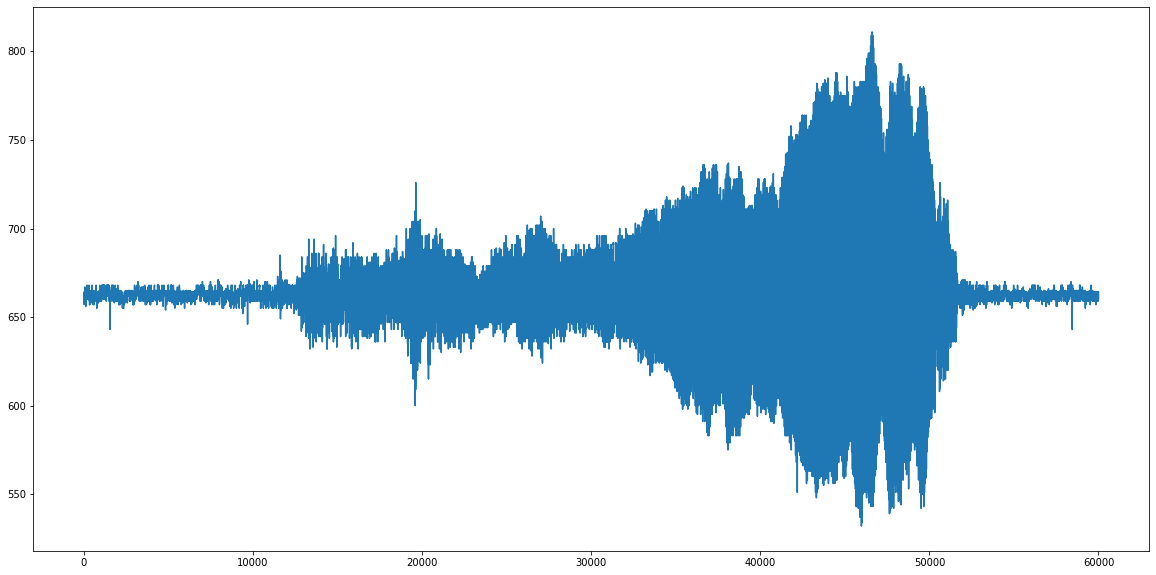

In [71]:
plt.figure(figsize=(20,10))
plt.plot(r04)

In [88]:
#####Plot functon with Chi-square calculation#####

def plot_shift(s, r, low_shift, high_shift, step):
    first_bin = 5000
    last_bin = 60000-5001

    s = s.astype(float) - np.mean(s)
    r = r.astype(float) - np.mean(r04)
    s_normalized = s / np.sqrt(np.std(s[first_bin: last_bin]))
    r_normalized = r / np.sqrt(np.std(r[first_bin: last_bin]))

    ###############################

    # send_04, receive_04

    chisq_sum_min = 1.e12
    chisq_sum_max = -1.
    min_shift_chisq = 0
    max_shift_chisq = 0

    bin_shift_array = np.arange(low_shift, high_shift, step)
    normalized_chisq_array = np.empty(len(bin_shift_array))

    ijk = 0

    for bin_shift in range(low_shift, high_shift, step):

        chisq_sum = 0.0
        #print(bin_shift)

        for index in range(first_bin, last_bin):

            chisq_sum = chisq_sum + (s_normalized[index] - r_normalized[index + bin_shift]) ** 2 

        normalized_chisq = chisq_sum / (last_bin - first_bin + 1)

        normalized_chisq_array[ijk] = normalized_chisq
        ijk = ijk + 1

        if(normalized_chisq < chisq_sum_min):
            chisq_sum_min = normalized_chisq
            min_shift_chisq = bin_shift

        if(normalized_chisq > chisq_sum_max):
            chisq_sum_max = normalized_chisq
            max_shift_chisq = bin_shift

    print("min, max chisq: ", chisq_sum_min, chisq_sum_max)
    print("index shift for min, max: ", min_shift_chisq, max_shift_chisq)

    # plot stuff: sender, receiver 02
    plt.figure(figsize=(20,10))
    plt.plot(bin_shift_array, normalized_chisq_array)

    # set labels and title
    plt.xlabel("bin shift")
    plt.ylabel("normalized chisq value")
    the_title = "sender_04, receiver_04 data"
    plt.title(the_title) 

min, max chisq:  120.37341049489109 223.8537532276148
index shift for min, max:  4700 4600


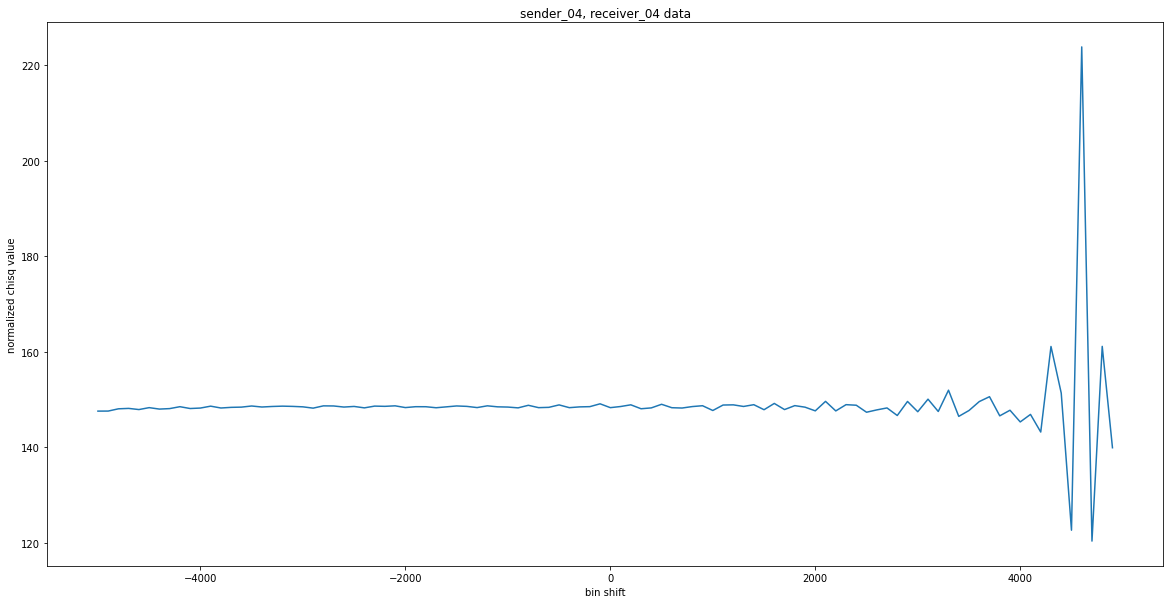

In [93]:
plot_shift(s04, r04, -5000, 5000, 100)

min, max chisq:  55.43238008844625 241.31589196168355
index shift for min, max:  4620 4640


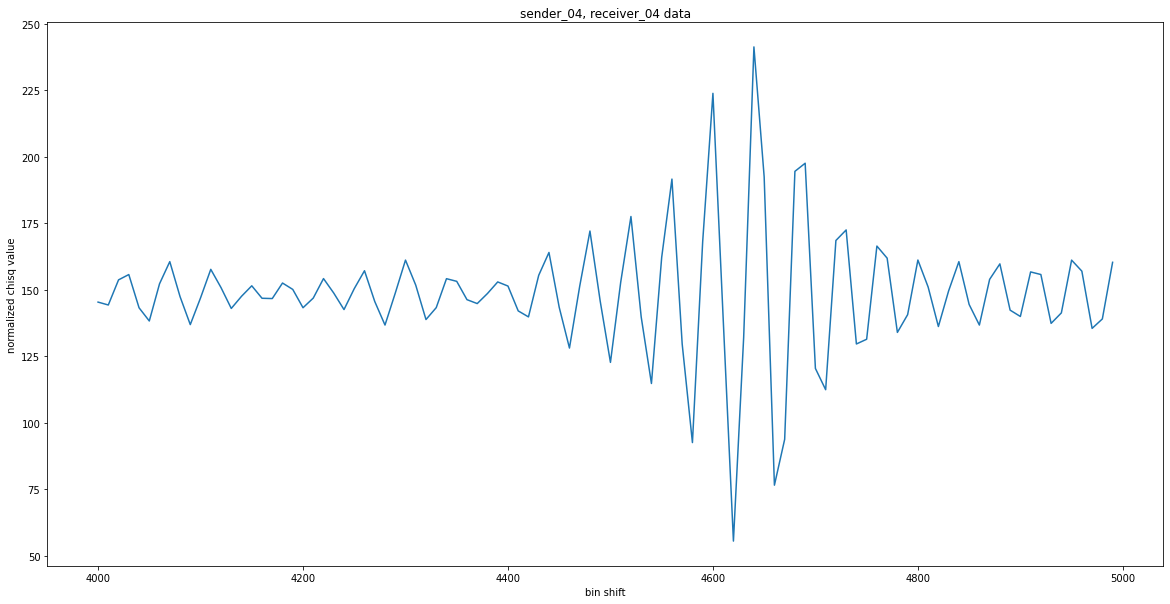

In [90]:
plot_shift(s04, r04, 4000, 5000, 10)

min, max chisq:  55.43238008844625 246.28577712218367
index shift for min, max:  4620 4642


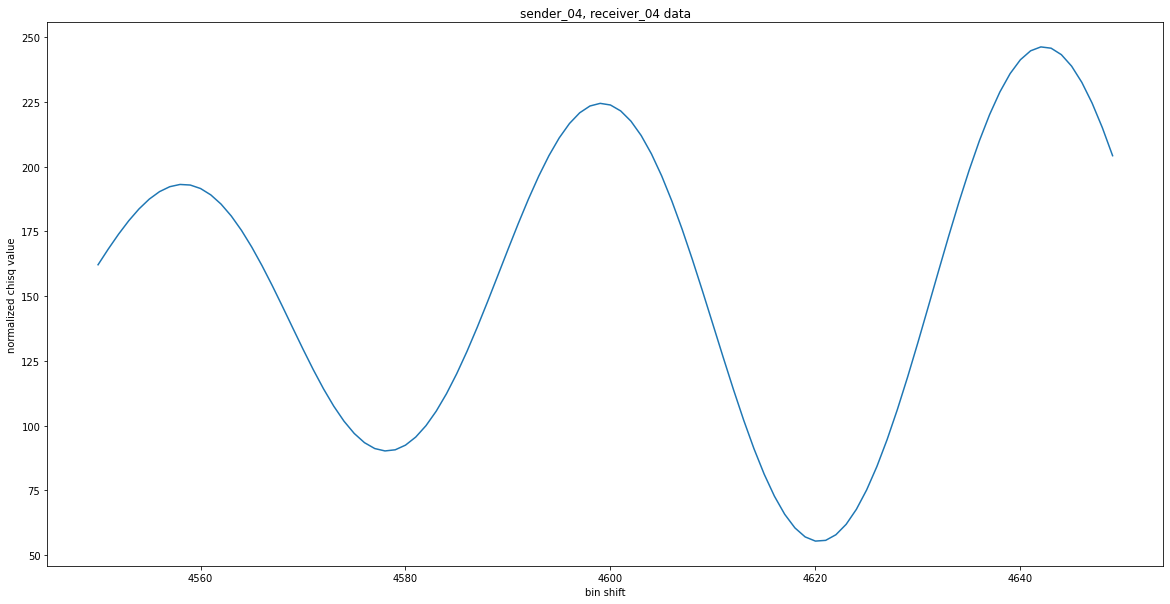

In [91]:
plot_shift(s04, r04, 4550, 4650, 1)